# Task 1 Anti-Cheat Pre-Filter

In this task, we will utilize the binary classification model to help us determine whether this player are a cheater or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import joblib


## Step 1: Data Preparation

### Step1.1: Download Data

In [2]:
df = pd.read_csv('task1/train.csv')
df.head()

,id,player_id,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
0,PLY00001,P058048,4.556072,15.494589,NaN,36.953785,0.737653,NaN,1204.586641,73.364603,...,0.653589,0.860407,0.487273,0.534021,0.321734,NaN,91.517681,0.736361,0.928522,0.0
1,PLY00002,P037400,6.177695,51.476210,86.670187,59.946064,NaN,93.748524,3.405453,84.104334,...,NaN,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0
2,PLY00003,P001054,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,...,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0
3,PLY00004,P062710,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,NaN,...,0.766887,0.612241,0.477374,NaN,0.402723,97.518653,121.315491,0.531533,0.860302,1.0
4,PLY00005,P068548,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,...,0.691935,0.653540,0.698389,NaN,0.197220,50.405967,79.110571,0.771739,0.853758,1.0


In [3]:
# Check size
df.shape

(40526, 34)

In [4]:
df.describe()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
count,39623.000000,34454.000000,36565.000000,39333.000000,39455.000000,29953.000000,32954.000000,30707.000000,32732.000000,37269.000000,...,34222.000000,37695.000000,37770.000000,30386.000000,39502.000000,33755.000000,35943.000000,39537.000000,37818.000000,39670.000000
mean,4.731515,47.925094,71.380532,40.093216,0.648557,134.944251,497.267589,62.943736,0.359546,137.996995,...,0.644673,0.595729,0.692021,0.339184,0.322768,66.235399,95.393896,0.579103,0.883215,0.347769
std,1.521166,13.876473,14.000018,12.152083,0.151354,51.183239,351.634245,20.739220,1.505461,85.053055,...,0.152696,0.156631,0.132432,0.138664,0.120338,24.267680,29.577511,0.173839,0.041533,0.476268
min,0.593991,5.000000,22.023482,8.000000,0.250000,55.000000,1.040054,25.024665,0.003612,0.000000,...,0.380018,0.236551,0.460038,0.100012,0.096895,8.560528,13.294239,0.280000,0.800002,0.000000
25%,3.697591,38.316908,61.677988,31.566764,0.543987,99.146220,158.672148,44.978694,0.040596,64.000000,...,0.512190,0.464502,0.578065,0.218600,0.219122,45.273449,70.237815,0.428713,0.848076,0.000000
50%,4.563667,47.210703,71.321729,39.531274,0.651768,128.450094,478.688381,63.052058,0.081337,136.000000,...,0.644229,0.588935,0.693049,0.339332,0.321883,66.221337,94.899970,0.578089,0.883149,0.000000
75%,5.545606,56.632987,81.040380,47.955538,0.756661,162.405438,764.302233,81.071760,0.211303,206.000000,...,0.777323,0.727343,0.805571,0.458972,0.424879,87.493823,120.327747,0.729647,0.918389,1.000000
max,12.000000,95.000000,100.000000,85.000000,0.980000,511.522726,1499.046539,99.996301,68.743539,349.000000,...,0.909989,0.879998,0.919980,0.579999,0.539994,107.999177,147.998079,0.879968,0.959998,1.000000


In [5]:
df.dtypes

,0
id,object
player_id,object
kill_death_ratio,float64
headshot_percentage,float64
win_rate,float64
accuracy_score,float64
kill_consistency,float64
reaction_time_ms,float64
account_age_days,float64
level,float64


In [6]:
df['is_cheater'].value_counts()

,count
is_cheater,
0.0,25874
1.0,13796


### Step 1.2: The missing values

In [7]:
def create_null_table(df):
    null_count = df.isnull().sum()
    null_percentage = df.isnull().sum() * 100 / len(df)

    # Create table
    null_table = pd.concat([null_count, null_percentage] ,axis = 1)

    # Rename columns
    null_table = null_table.rename(columns={0: "Missing value counts", 1: "Missing value percentage"})

    # Sort value
    null_table = null_table[null_table.iloc[:,-1] != 0].sort_values('Missing value counts', ascending=False).round(1)
    return null_table

In [8]:
null_table = create_null_table(df)
null_table

,Missing value counts,Missing value percentage
reaction_time_ms,10573,26.1
clutch_success_rate,10140,25.0
reports_received,9861,24.3
level,9819,24.2
movement_pattern_score,9666,23.9
game_sense_score,9250,22.8
level_progression_speed,7794,19.2
account_age_days,7572,18.7
input_consistency_score,7151,17.6
survival_time_avg,6771,16.7


Visualize the missing data using Missingno

<Axes: >

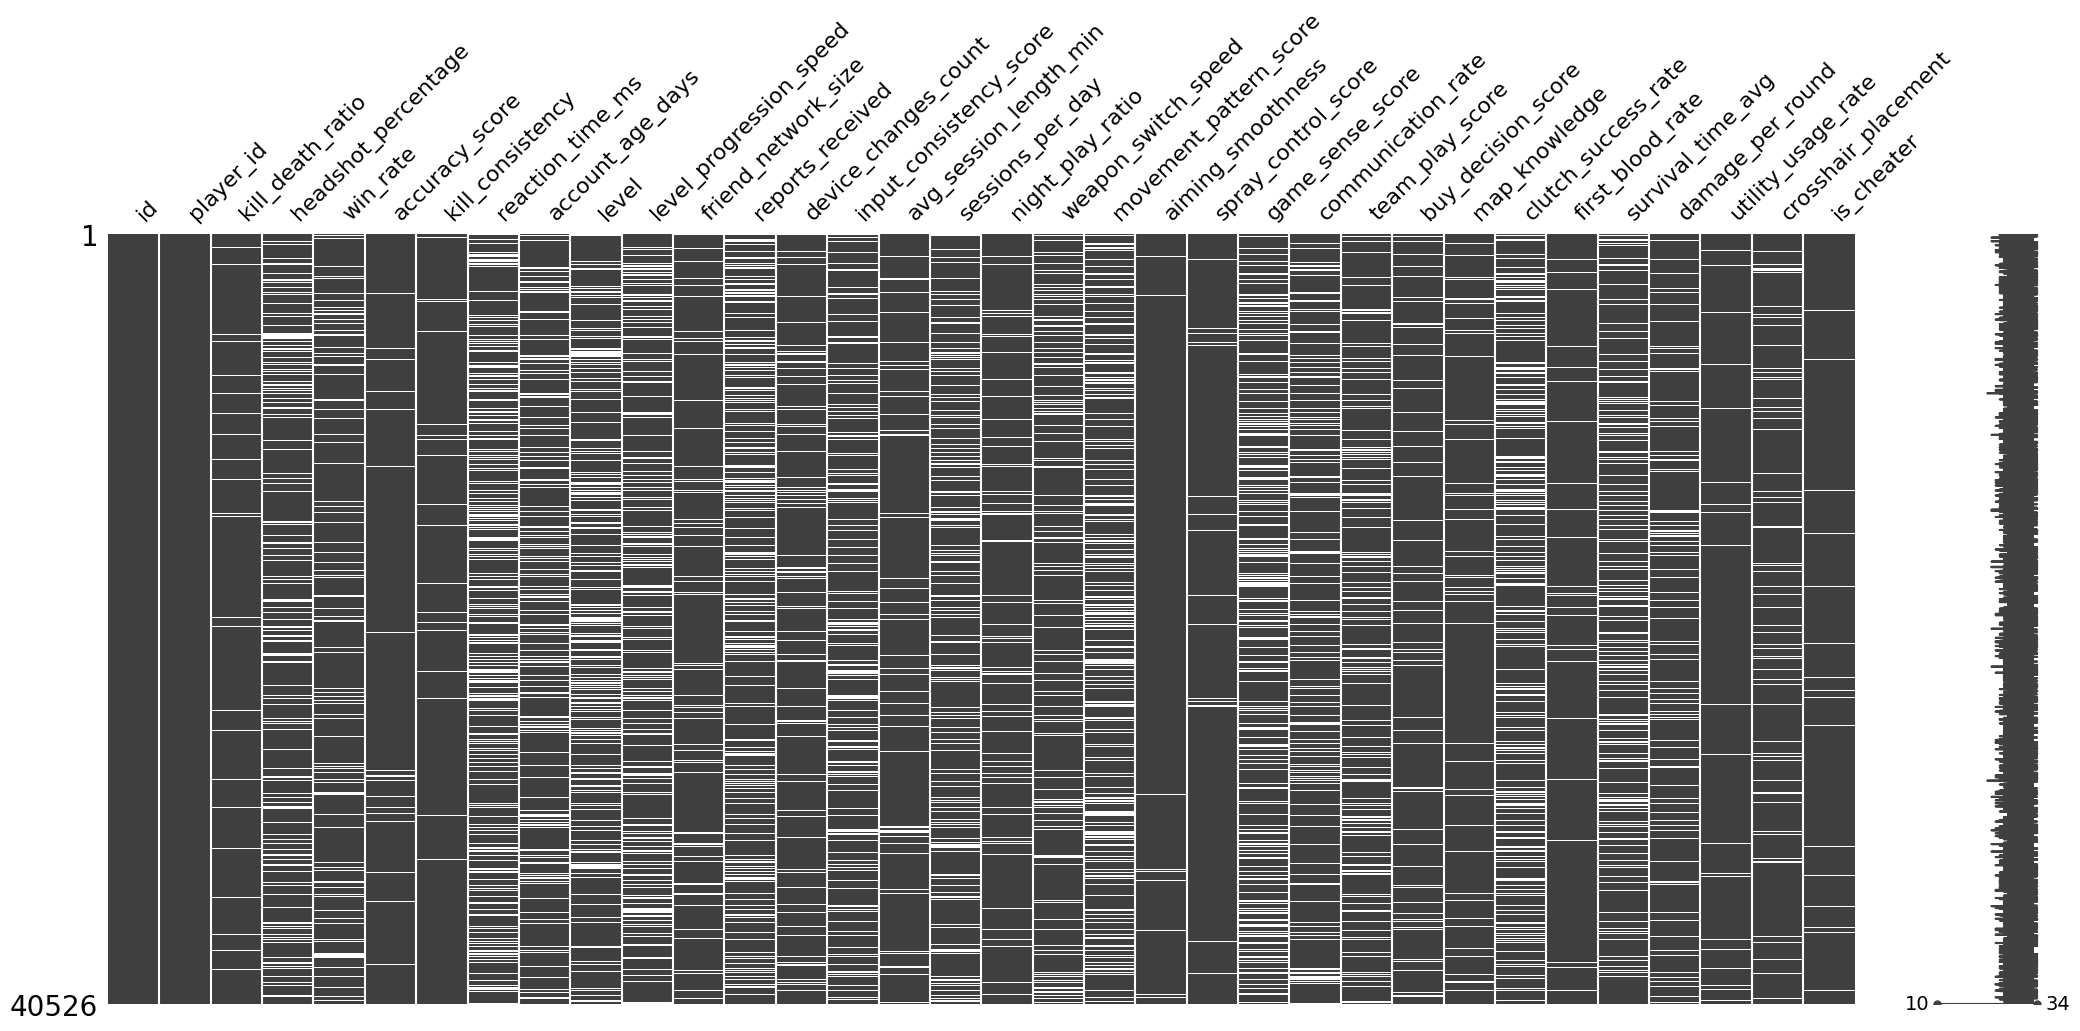

In [9]:
msno.matrix(df)

#### Step 1.2.1: Drop some rows and columns

We need to drop the row with missing `is_cheater` value, since that part is essential for our model.

In [10]:
df.dropna(subset =  ['is_cheater'], how = 'any', inplace = True)

df['is_cheater'].isnull().sum()

np.int64(0)

In [11]:
df.drop(['id', 'player_id'], axis = 1, inplace = True)

df.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
0,4.556072,15.494589,NaN,36.953785,0.737653,NaN,1204.586641,73.364603,0.033039,122.0,...,0.653589,0.860407,0.487273,0.534021,0.321734,NaN,91.517681,0.736361,0.928522,0.0
1,6.177695,51.476210,86.670187,59.946064,NaN,93.748524,3.405453,84.104334,12.211503,0.0,...,NaN,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0
2,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,0.076185,205.0,...,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0
3,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,NaN,NaN,75.0,...,0.766887,0.612241,0.477374,NaN,0.402723,97.518653,121.315491,0.531533,0.860302,1.0
4,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,0.354636,79.0,...,0.691935,0.653540,0.698389,NaN,0.197220,50.405967,79.110571,0.771739,0.853758,1.0


#### Step 1.2.2: Replace missing value

We will handling the missing data with IterativeImputer from Scikit-learn

In [12]:
# train_knn = df.copy(deep=True)

# knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

# df_knn = knn_imputer.fit_transform(train_knn)

In [13]:
df_mice = df.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

reconstruct the dataFrame

In [14]:
df_filled = pd.DataFrame(df_mice, columns = df.columns)

df_filled.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement,is_cheater
0,4.556072,15.494589,73.680669,36.953785,0.737653,165.340033,1204.586641,73.364603,0.033039,122.0,...,0.653589,0.860407,0.487273,0.534021,0.321734,65.952849,91.517681,0.736361,0.928522,0.0
1,6.177695,51.476210,86.670187,59.946064,0.612927,93.748524,3.405453,84.104334,12.211503,0.0,...,0.644428,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558,0.0
2,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,0.076185,205.0,...,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872,0.0
3,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,60.989720,0.781328,75.0,...,0.766887,0.612241,0.477374,0.338143,0.402723,97.518653,121.315491,0.531533,0.860302,1.0
4,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,0.354636,79.0,...,0.691935,0.653540,0.698389,0.335124,0.197220,50.405967,79.110571,0.771739,0.853758,1.0


In [15]:
df_filled.isnull().sum()

,0
kill_death_ratio,0
headshot_percentage,0
win_rate,0
accuracy_score,0
kill_consistency,0
reaction_time_ms,0
account_age_days,0
level,0
level_progression_speed,0
friend_network_size,0


### Step 1.3: Handle class imblance

### Step 2: Training Preparation

#### Step 2.1: Undersampling

In [16]:
df = df_filled

cheater_player = df[df.is_cheater == 1.0]
legit_player = df[df.is_cheater == 0.0]

sample_cheater = cheater_player

sample_legit = legit_player.sample(n = len(sample_cheater),
                                               replace = False,
                                               random_state = 123)

data_undersample = pd.concat([sample_cheater, sample_legit], axis = 0)

data_undersample = df_filled

#### Step 2.1: Train/Test split

In [17]:
X = data_undersample.drop(['is_cheater'], axis = 1)

X.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement
0,4.556072,15.494589,73.680669,36.953785,0.737653,165.340033,1204.586641,73.364603,0.033039,122.0,...,0.620589,0.653589,0.860407,0.487273,0.534021,0.321734,65.952849,91.517681,0.736361,0.928522
1,6.177695,51.476210,86.670187,59.946064,0.612927,93.748524,3.405453,84.104334,12.211503,0.0,...,0.851946,0.644428,0.410925,0.690833,0.151872,0.462196,84.599562,119.212421,0.525739,0.946558
2,6.584511,51.692578,32.827778,46.545739,0.811803,120.895839,551.221686,43.803175,0.076185,205.0,...,0.636306,0.639732,0.619968,0.511507,0.311445,0.270611,83.793333,58.200726,0.739374,0.897872
3,5.237014,44.181842,62.740475,30.260066,0.345491,248.056545,114.034430,60.989720,0.781328,75.0,...,0.799637,0.766887,0.612241,0.477374,0.338143,0.402723,97.518653,121.315491,0.531533,0.860302
4,2.453744,44.361101,68.296046,27.470153,0.851962,210.530688,153.210944,83.293728,0.354636,79.0,...,0.242936,0.691935,0.653540,0.698389,0.335124,0.197220,50.405967,79.110571,0.771739,0.853758


In [18]:
y = data_undersample['is_cheater']

y.head()

,is_cheater
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

# Checking the new size
X_train.shape

(31736, 31)

#### Step 2.2: Loss Function Preparation

In [4]:
from sklearn.metrics import precision_score, recall_score
def f2_score(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')

    f2 = 5 * (precision * recall) / (4*precision + recall)
    return f2

### Step 3: Train the model

In [3]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

In [ ]:
# Parameters
C = [3,5,6,9]

param_grid = {'model__penalty': ['l2'], "model__solver": ['liblinear'], "model__C": C}

# Pipeline to scale during the grid search
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(random_state=0,
                                 class_weight = "balanced"))
])

# Create GridSearch
Logistic_model = GridSearchCV(estimator=pipeline,
                              param_grid=param_grid,
                              scoring = make_scorer(f2_score),
                              n_jobs=-1,
                              cv=5,
                              verbose=1,
                              error_score='raise',
                              return_train_score=True
                              )

Logistic_model.fit(X_train, y_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=0))]),
             n_jobs=-1,
             param_grid={'model__C': [3, 5, 6, 9], 'model__penalty': ['l2'],
                         'model__solver': ['liblinear']},
             return_train_score=True,
             scoring=make_scorer(f2_score, response_method='predict'),
             verbose=1)

In [ ]:
# RANOOM FOREST

param_grid = {
    'n_estimators': [200],
    'max_features': ['sqrt'],
    'class_weight': ['balanced_subsample', 'balanced'],
    'max_depth': [7, 8],
    'min_samples_split': [7, 8],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

forest = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                      param_grid=param_grid,
                      scoring=make_scorer(f2_score),
                      n_jobs=-1,
                      cv=5,
                      verbose=1,
                      error_score='raise',
                     return_train_score= True)

forest.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'class_weight': ['balanced_subsample', 'balanced'],
                         'max_depth': [7, 8], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [7, 8], 'n_estimators': [200]},
             return_train_score=True,
             scoring=make_scorer(f2_score, response_method='predict'),
             verbose=1)

In [29]:

forest2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
forest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [24]:
y_pred = Logistic_model.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [25]:
y_pred_tree = forest.predict(X_test)
y_pred_tree

array([0., 1., 0., ..., 0., 0., 0.])

In [31]:
y_pred_tree2 = forest2.predict(X_test)
y_pred_tree2

array([0., 1., 0., ..., 0., 0., 0.])

## Step 4: Evaluation

In [26]:
f2 = f2_score(y_test, y_pred)
print(f2)

0.7421586687686577


In [27]:
f2 = f2_score(y_test, y_pred_tree)
print(f2)

0.8291158643133543


In [32]:
f2 = f2_score(y_test, y_pred_tree2)
print(f2)

0.8088604689432974


In [33]:
# Save the model as a pickle in a file
joblib.dump(forest, 'task1/model.pkl')

['task1/model.pkl']

## Step 5: Predict test

In [5]:
model = joblib.load('task1/model.pkl')

/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine learning/CPE342-Karena/venv/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mahwayji/storage/kmutt pro/kmutt year 3/Machine le

Load Test file

In [8]:
df_test = pd.read_csv("task1/test.csv")

df_test.head()

,id,player_id,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,...,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement
0,ANS00001,P128393,4.807460,NaN,85.513445,40.885421,0.541166,206.216513,554.404426,26.449873,...,0.466226,0.407562,0.574111,NaN,0.239997,0.331286,39.167105,133.600242,0.854674,0.810149
1,ANS00002,P057262,4.478905,54.549192,66.998239,41.730924,0.866650,80.200970,718.385124,30.350951,...,0.850628,0.825845,0.717767,0.604164,0.258227,0.218852,84.855443,67.842696,0.408059,NaN
2,ANS00003,P063924,6.982952,37.740360,76.489177,46.397954,NaN,141.426624,525.868237,69.546770,...,0.444088,0.908123,0.538952,0.618745,0.407880,0.261211,98.825249,65.697213,0.285722,0.822645
3,ANS00004,P051190,5.003208,44.231043,69.877125,33.585034,0.959418,110.800568,1089.867093,41.780396,...,0.601710,0.445652,0.464034,0.865429,0.139233,0.127039,31.225586,139.140240,0.626042,0.959571
4,ANS00005,P023176,3.038168,NaN,NaN,29.467070,0.567550,84.594256,109.235604,83.159919,...,0.300572,0.534116,NaN,0.758842,0.346107,0.471993,NaN,48.957231,0.774780,0.872152


In [14]:
df_test.drop(['id', 'player_id'], axis = 1, inplace = True)
df_test.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement
0,4.807460,NaN,85.513445,40.885421,0.541166,206.216513,554.404426,26.449873,0.014689,241.0,...,0.466226,0.407562,0.574111,NaN,0.239997,0.331286,39.167105,133.600242,0.854674,0.810149
1,4.478905,54.549192,66.998239,41.730924,0.866650,80.200970,718.385124,30.350951,0.041464,111.0,...,0.850628,0.825845,0.717767,0.604164,0.258227,0.218852,84.855443,67.842696,0.408059,NaN
2,6.982952,37.740360,76.489177,46.397954,NaN,141.426624,525.868237,69.546770,0.122001,92.0,...,0.444088,0.908123,0.538952,0.618745,0.407880,0.261211,98.825249,65.697213,0.285722,0.822645
3,5.003208,44.231043,69.877125,33.585034,0.959418,110.800568,1089.867093,41.780396,0.016516,233.0,...,0.601710,0.445652,0.464034,0.865429,0.139233,0.127039,31.225586,139.140240,0.626042,0.959571
4,3.038168,NaN,NaN,29.467070,0.567550,84.594256,109.235604,83.159919,0.664005,41.0,...,0.300572,0.534116,NaN,0.758842,0.346107,0.471993,NaN,48.957231,0.774780,0.872152


Load Answer file

In [10]:
df_ans = pd.read_csv("Answer.csv")

df_ans.head()

,id,task1,task2,task3,task4,task5
0,ANS00001,1.0,2,7204.482932,2,0.0
1,ANS00002,0.0,0,4437.066076,0,0.0
2,ANS00003,0.0,0,109102.447463,0,0.0
3,ANS00004,0.0,1,0.000000,0,0.0
4,ANS00005,0.0,0,1300.092167,0,0.0


In [23]:
df_mice = df_test.copy(deep=True)

mice_imputer = IterativeImputer()

df_mice = mice_imputer.fit_transform(df_mice)

In [25]:
df_filled = pd.DataFrame(df_mice, columns = df_test.columns)

df_filled.head()

,kill_death_ratio,headshot_percentage,win_rate,accuracy_score,kill_consistency,reaction_time_ms,account_age_days,level,level_progression_speed,friend_network_size,...,communication_rate,team_play_score,buy_decision_score,map_knowledge,clutch_success_rate,first_blood_rate,survival_time_avg,damage_per_round,utility_usage_rate,crosshair_placement
0,4.807460,48.090088,85.513445,40.885421,0.541166,206.216513,554.404426,26.449873,0.014689,241.0,...,0.466226,0.407562,0.574111,0.691926,0.239997,0.331286,39.167105,133.600242,0.854674,0.810149
1,4.478905,54.549192,66.998239,41.730924,0.866650,80.200970,718.385124,30.350951,0.041464,111.0,...,0.850628,0.825845,0.717767,0.604164,0.258227,0.218852,84.855443,67.842696,0.408059,0.888604
2,6.982952,37.740360,76.489177,46.397954,0.636090,141.426624,525.868237,69.546770,0.122001,92.0,...,0.444088,0.908123,0.538952,0.618745,0.407880,0.261211,98.825249,65.697213,0.285722,0.822645
3,5.003208,44.231043,69.877125,33.585034,0.959418,110.800568,1089.867093,41.780396,0.016516,233.0,...,0.601710,0.445652,0.464034,0.865429,0.139233,0.127039,31.225586,139.140240,0.626042,0.959571
4,3.038168,45.766296,68.739595,29.467070,0.567550,84.594256,109.235604,83.159919,0.664005,41.0,...,0.300572,0.534116,0.589531,0.758842,0.346107,0.471993,64.978979,48.957231,0.774780,0.872152


Predict data and save

In [26]:
df_ans['task1'] = model.predict(df_test)

df_ans['task1'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: task1, dtype: float64

In [27]:
df_ans.to_csv("Answer.csv", index=False)